<a href="https://colab.research.google.com/github/tunnu-sahni/ML_Projects/blob/main/kmeancluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k mean clustering algorithms implementation


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2,
                  random_state=0)

In [6]:
X.shape

(100, 2)

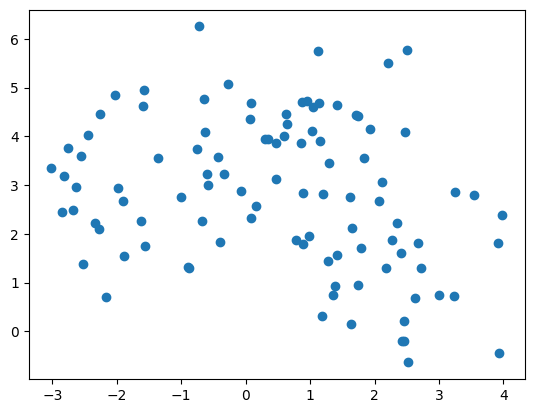

In [7]:
plt.scatter(X[:,0],X[:,1])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.cluster import KMeans

In [14]:
## Manual process
## Elbow method to select the K value

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[384.0871258295666,
 196.5091378433274,
 101.3520173299962,
 79.25762745176624,
 65.42597031908174,
 60.706212409518564,
 53.0522471275187,
 39.15434572948543,
 37.450406128329575,
 34.61764008884274]

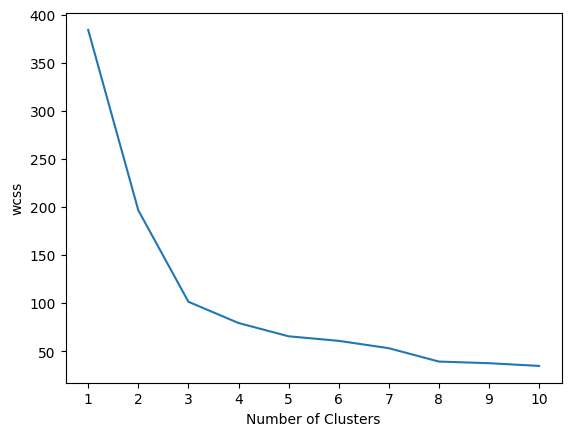

In [17]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [18]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [21]:
y_labels = kmeans.fit_predict(X_train)

In [23]:
y_test_labels=kmeans.predict(X_test)

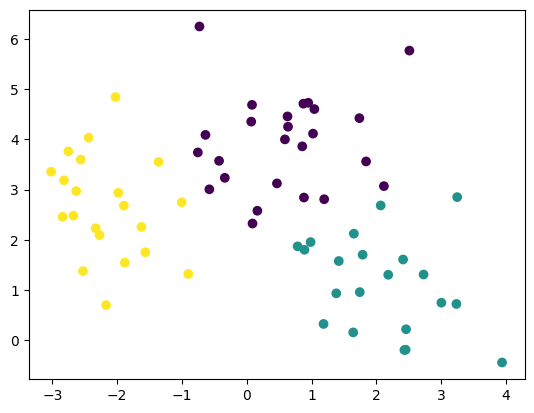

In [22]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [25]:
## knee locator
!pip install kneed

In [31]:
from kneed import KneeLocator

In [32]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(3)

In [35]:
## performance metrics
## silhoutte score
from sklearn.metrics import silhouette_score

In [43]:
silhoutte_coeficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhoutte_coeficients.append(score)

In [44]:
silhoutte_coeficients

[np.float64(0.42916740291385563),
 np.float64(0.47417166324965404),
 np.float64(0.38131417241520765),
 np.float64(0.3949745854556908),
 np.float64(0.3274112120257287),
 np.float64(0.3257528363541474),
 np.float64(0.3452494646393938),
 np.float64(0.36223816912376433),
 np.float64(0.32058071926100085)]

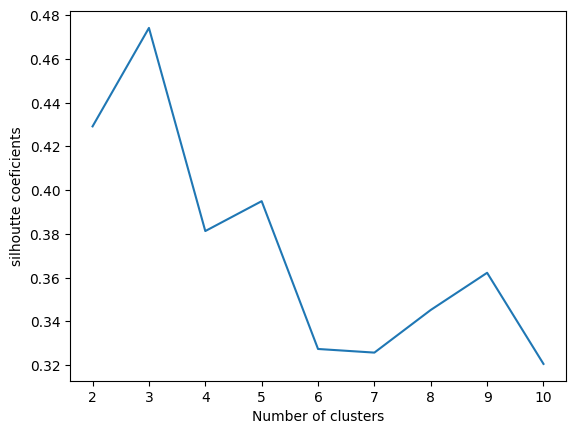

In [46]:
## ploting silhoutte score
plt.plot(range(2,11),silhoutte_coeficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhoutte coeficients")
plt.show()